Back to the main [Index](../index.ipynb)

In [1]:
# Use %matplotlib if you are running in the ipython shell.
%matplotlib notebook

from __future__ import print_function, division
from abipy import abilab
from abipy.lessons.lesson_relaxation import Lesson

lesson = Lesson()
lesson 

Relaxation of the unit cell with two different techniques
=========================================================

Background
----------

In this lesson we discuss two different methods to find the equilibrium  structure of a system.
In the first method, we use the GS part of Abinit to calculate the total energy of silicon for
different volumes and then we fit the energy vs the volume with a model for the equation of state (EOS).
The fit provides the optimal volume (i.e. the volume for which the total energy is minimal),
as well as the bulk modulus (the 'compressibility' of the system).
Note that this approach is only applicable to isotropic materials without any degree of freedom for the atomic positions.
Indeed, the equation of state is obtained by performing a homogeneous compressions/dilatation of
the initial Bravais lattice while keeping the atoms fixed in the initial high-symmetry positions.

In the second example, we find the equilibrium configuration of GaN.
In this case, the approach used for computing the EOS of silicon is not applicable because,
one should optimize both the lattice parameters as well the distance between Ga and N.
For this reason, we employ the relaxation algorithms implemented in Abinit (`ionmov` and `optcell`)
in which the forces and the stresses obtained at the end of the SCF cycle are used to find the minimum energy configuration.

The related abinit variables
----------------------------

    * ionmov
    * optcell
    * dilatmx
    * ecutsm
    * ntime
    * tolmxf
    * tolrff


For a more detailed description of the variables, you are invited to consult the abinit documentation.
The full description, directly from the official abinit docs, is available in ipython with the command:

    .. code-block:: python

        print(lesson.docvar("inputvariable"))


Description of the lesson
-------------------------

We will use two different AbiPy flows to find the equilibrium configuration.
The first flow, si_flow, calculates the total energy of silicon at different volumes
and computes the equation of state E(V).
The other flow, gan_flow, uses Abinit to optimize all degrees of freedom (atomic positions
and lattice vectors).

Executing the lesson
--------------------

Start this lesson by importing it with the commands:

    .. code-block:: python

        from abipy.lessons.lesson_relaxation import Lesson
        lesson = Lesson()

As usual, you can reread this text using the command:

    .. code-block:: python

        lesson

To build the flow for silicon, use

    .. code-block:: python

        si_flow = lesson.make_eos_flow()

For Gallium Nitride, use

    .. code-block:: python

        gan_flow = lesson.make_relax_flow()

To print the input files

    .. code-block:: python

        si_flow.show_inputs()

Start the flow with the scheduler and wait for completion.

    .. code-block:: python

        si_flow.make_scheduler().start()

To analyze the results.

    .. code-block:: python

        # For Silicon
        lesson.analyze_eos_flow(si_flow)

        # For Gallium Nitride, use
        lesson.analyze_eos_flow(gan_flow)

In the case of silicon, python will show a fit of the total energy vs the
volume of the unit cell. The minimum of this curve is the equilibrium
volume. From this fit, we can also obtain the bulk modulus.
Note that this approach is only applicable to isotropic materials since the
equation of state has been obtained by performing
a homogeneous compressions/dilatation of the initial Bravais lattice.

Try to compare the results with these experimental results:
Volume of the unit cell of silicon: 40.05 A^3 [NSM]
Bulk modulus: 98 GPa [NSM]

In the case of gallium nitride, you will observe a change of the equilibrium
parameters with respect to the k-point mesh.

Try to compare the results with these experimental results:

    * Volume of the unit cell of GaN: 45.73 A^3 [Schulz & Thiemann 1977]
    * Lattice parameters of GaN: a = 3.190 A, c = 5.189 A [Schulz & Thiemann 1977]

Equation of State for Silicon
-----------------------------

In [2]:
si_flow = lesson.make_eos_flow()

<IPython.core.display.Javascript object>


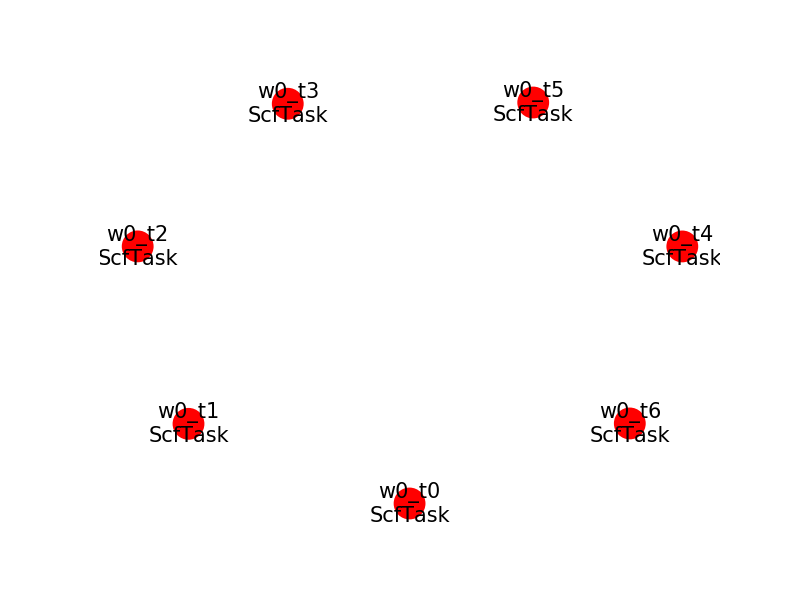

In [3]:
si_flow.plot_networkx()

Seven independent `ScfTasks`, each one with a different volumes of the cell. 
This flow is embarrassingly parallel!

In [4]:
%%capture
si_flow.make_scheduler().start()

0

In [5]:
si_flow.show_status(verbose=1)


Work #0: <Work, node_id=84595, workdir=flow_si_relax/w0>, Finalized=True
+--------+-----------+----------------+--------------+------------+---------+-----------------+----------+-----------+
| Task   | Status    | Queue          | MPI|Omp|Gb   | Warn|Com   | Class   | Sub|Rest|Corr   | Time     |   Node_ID |
+========+===========+================+==============+============+=========+=================+==========+===========+
| w0_t0  | Completed | 7124@localhost | 2|  1|2.0    | 2|  0      | ScfTask | (1, 0, 0)       | 0:00:19R |     84596 |
+--------+-----------+----------------+--------------+------------+---------+-----------------+----------+-----------+
| w0_t1  | Completed | 7133@localhost | 2|  1|2.0    | 2|  0      | ScfTask | (1, 0, 0)       | 0:00:20R |     84597 |
+--------+-----------+----------------+--------------+------------+---------+-----------------+----------+-----------+
| w0_t2  | Completed | 7142@localhost | 2|  1|2.0    | 2|  0      | ScfTask | (1, 0, 0)      

We are gonna read the results from these files:

In [6]:
si_flow.listext("GSR")

Found 7 files with extension GSR produced by the flow
File                                      Size [Mb]    Node_ID  Node Class
--------------------------------------  -----------  ---------  ------------
flow_si_relax/w0/t0/outdata/out_GSR.nc         0.01      84596  ScfTask
flow_si_relax/w0/t1/outdata/out_GSR.nc         0.01      84597  ScfTask
flow_si_relax/w0/t2/outdata/out_GSR.nc         0.01      84598  ScfTask
flow_si_relax/w0/t3/outdata/out_GSR.nc         0.01      84599  ScfTask
flow_si_relax/w0/t4/outdata/out_GSR.nc         0.01      84600  ScfTask
flow_si_relax/w0/t5/outdata/out_GSR.nc         0.01      84601  ScfTask
flow_si_relax/w0/t6/outdata/out_GSR.nc         0.01      84602  ScfTask


<IPython.core.display.Javascript object>


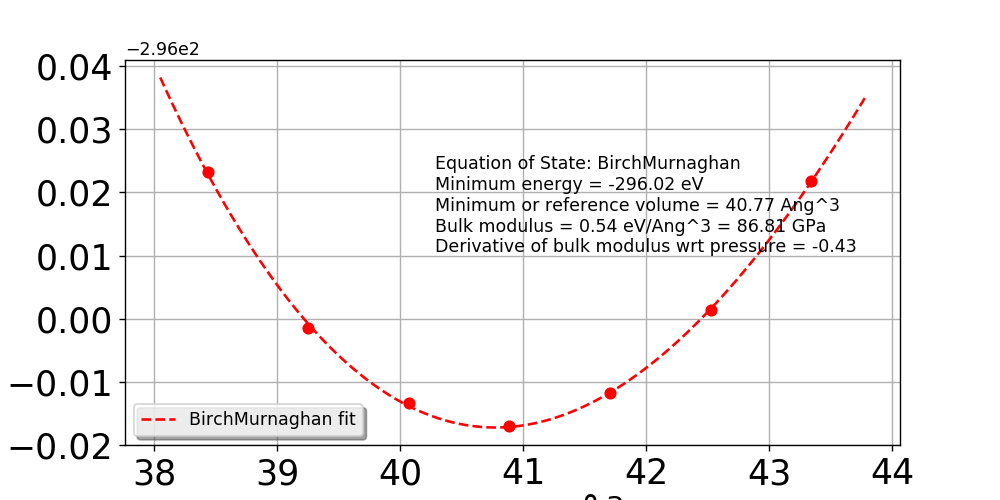

In [20]:
fig = lesson.analyze_eos_flow(si_flow)

# Structural relaxations for GaN (convergence study wrt $k$-points)

In [8]:
gan_flow = lesson.make_relax_flow()
gan_flow.plot_networkx()

Three independent `RelaxTasks` done with increasing number of $k$-points

In [9]:
gan_flow.show_inputs()



<RelaxTask, node_id=84605, workdir=flow_gan_relax/w0/t0>
############################################################################################
#                                      SECTION: varbas                                      
############################################################################################
# <Energy CUToff>
 ecut 20
# <Number of (non-)self-consistent field STEPS>
 nstep 30
# <TOLerance on the Relative diFference of Forces>
 tolrff 0.05
# <KPoinTs OPTion>
 kptopt 1
# <SHIFT for K points>
 shiftk 0 0 0
# <Number of Grid points for K PoinTs generation>
 ngkpt 3 3 2
# <Number of SHIFTs for K point grids>
 nshiftk 1
############################################################################################
#                                      SECTION: varrlx                                      
############################################################################################
# <DILATation : MaXimal value>
 dilatmx 1.05
# <Number 

Run the flow with the scheduler

In [10]:
%%capture
gan_flow.make_scheduler().start()

0

In [11]:
gan_flow.show_status(verbose=1)


Work #0: <Work, node_id=84604, workdir=flow_gan_relax/w0>, Finalized=True
+--------+-----------+----------------+--------------+------------+-----------+-----------------+----------+-----------+
| Task   | Status    | Queue          | MPI|Omp|Gb   | Warn|Com   | Class     | Sub|Rest|Corr   | Time     |   Node_ID |
+========+===========+================+==============+============+===========+=================+==========+===========+
| w0_t0  | Completed | 7417@localhost | 2|  1|2.0    | 3|  1      | RelaxTask | (1, 0, 0)       | 0:01:52R |     84605 |
+--------+-----------+----------------+--------------+------------+-----------+-----------------+----------+-----------+
| w0_t1  | Completed | 7426@localhost | 2|  1|2.0    | 3|  0      | RelaxTask | (1, 0, 0)       | 0:03:45R |     84606 |
+--------+-----------+----------------+--------------+------------+-----------+-----------------+----------+-----------+
| w0_t2  | Completed | 7435@localhost | 2|  1|2.0    | 2|  0      | RelaxTask 

Plot the convergence of the lattice parameters wrt the number of $k$-points in the IBZ.

<IPython.core.display.Javascript object>


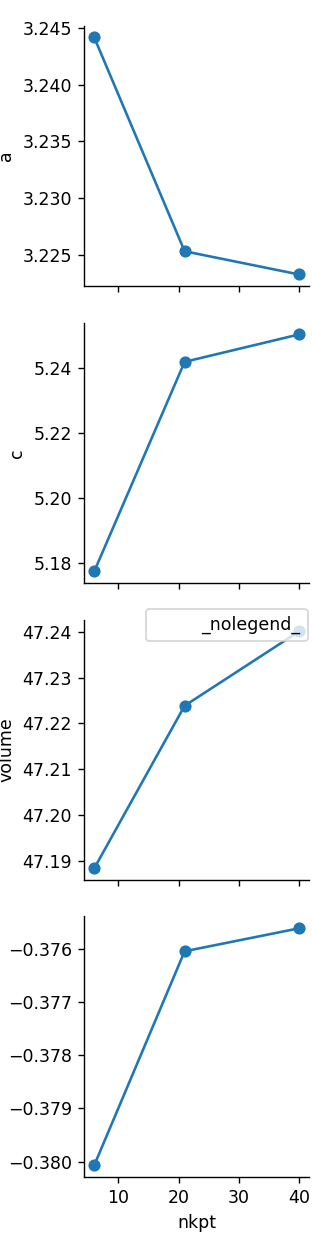

In [12]:
# Lenghts are in Angstroms, volumes in A^3
fig = lesson.analyze_relax_flow(gan_flow)

Hint: The `inspect` method of a `RelaxTask` instance produces a plot with the
evolution of the lattice parameters during the structural rerlaxation

<IPython.core.display.Javascript object>


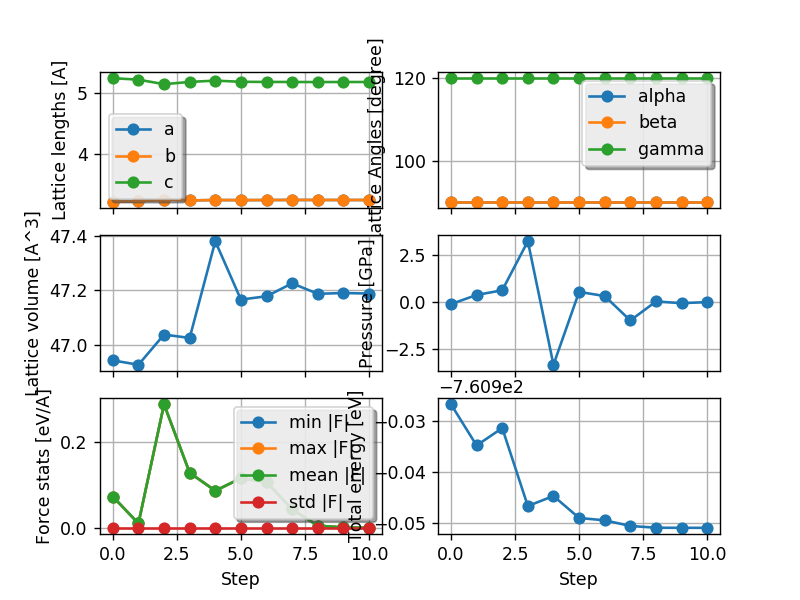

In [13]:
# Inspect the first task in the first workflow i.e. the one done with the [3, 3, 2] k-mesh
gan_332 = gan_flow[0][0]
fig = gan_332.inspect()

To inspect all the tasks:

Inspecting task <RelaxTask, node_id=84605, workdir=flow_gan_relax/w0/t0>


<IPython.core.display.Javascript object>


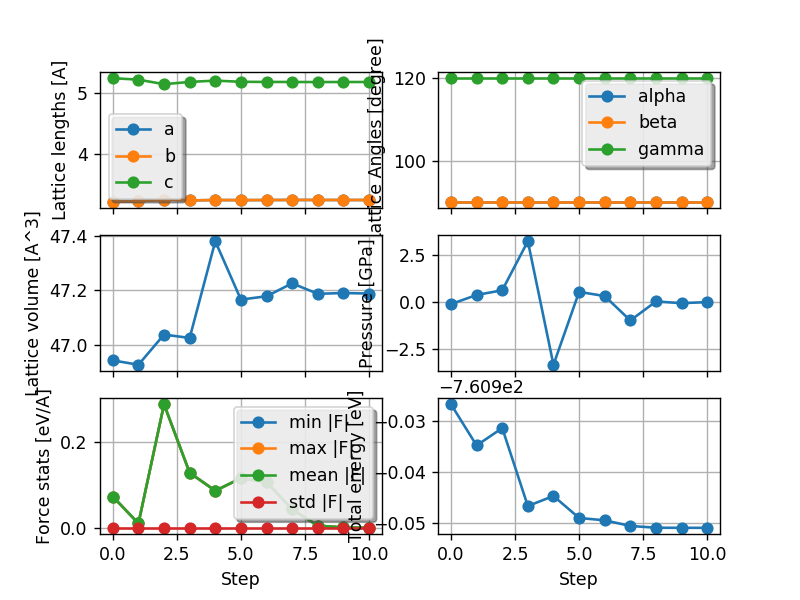

Inspecting task <RelaxTask, node_id=84606, workdir=flow_gan_relax/w0/t1>


<IPython.core.display.Javascript object>


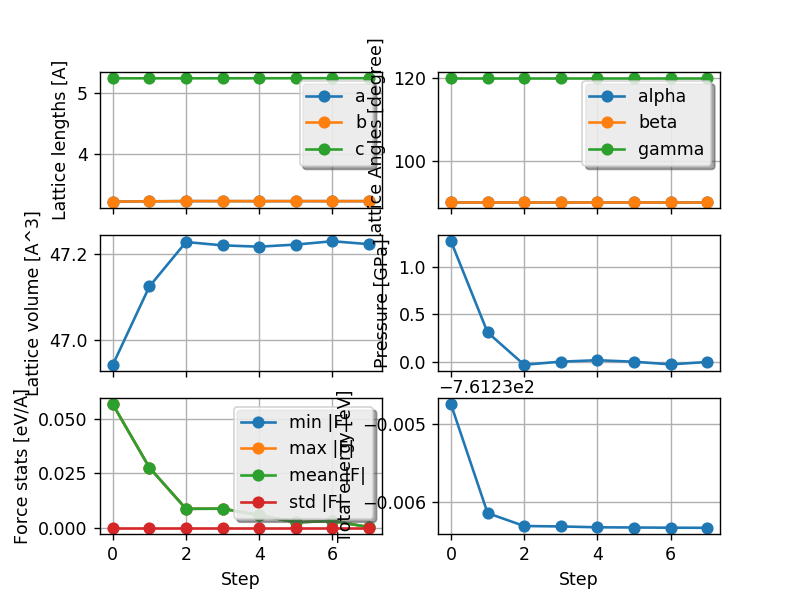

Inspecting task <RelaxTask, node_id=84607, workdir=flow_gan_relax/w0/t2>


<IPython.core.display.Javascript object>


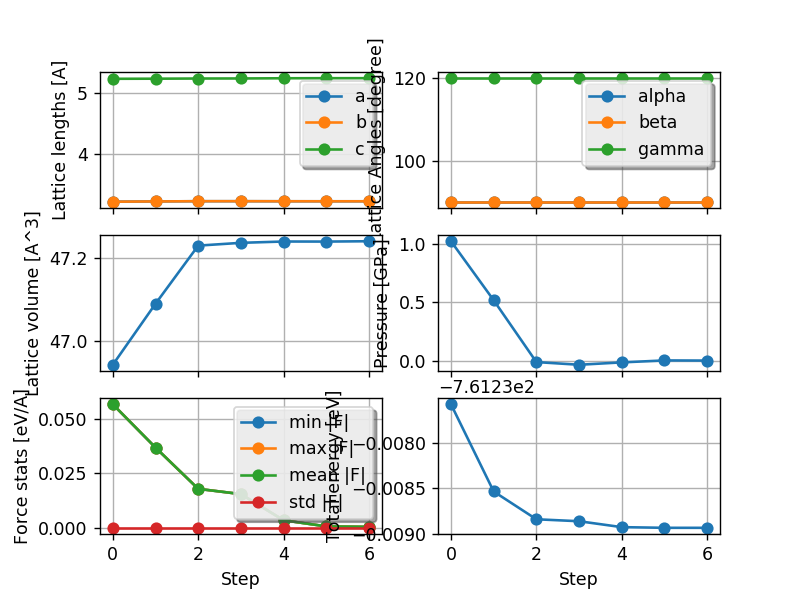

In [14]:
for task in gan_flow[0]:
    print("Inspecting task", task)
    task.inspect()

To get the final relaxed structure

In [15]:
gan_886 = gan_flow[0][-1]
print("ngkpt: ", gan_886.input["ngkpt"])

final_structure = gan_886.get_final_structure()

print(final_structure)
print("Volume: ", final_structure.volume, "Ang^3")

ngkpt:  [8, 8, 6]
Full Formula (Ga2 N2)
Reduced Formula: GaN
abc   :   3.223282   3.223282   5.250287
angles:  90.000000  90.000000 120.000000
Sites (4)
  #  SP           a         b         c  cartesian_forces
---  ----  --------  --------  --------  --------------------------------------------------------------
  0  Ga    0.333333  0.666667  0.500305  [ -9.53435621e-21   4.95419681e-20   4.40406562e-04] eV ang^-1
  1  Ga    0.666667  0.333333  0.000305  [ -4.76717810e-20  -1.92663209e-19   4.40406562e-04] eV ang^-1
  2  N     0.333333  0.666667  0.124695  [  6.67404935e-20   1.37616578e-19  -4.40406562e-04] eV ang^-1
  3  N     0.666667  0.333333  0.624695  [ -9.53435621e-21   5.50466312e-21  -4.40406562e-04] eV ang^-1
Volume:  47.2400502377 Ang^3


# Using `Robots` and Pandas `DataFrames`:

Let's build a pandas table with the final results of the three different relaxations:

In [16]:
with abilab.GsrRobot.from_flow(gan_flow) as robot:
    print(robot)
    frame = robot.get_dataframe()

frame

GsrRobot with 3 files in memory
  [0] flow_gan_relax/w0/t0/outdata/out_GSR.nc
  [1] flow_gan_relax/w0/t1/outdata/out_GSR.nc
  [2] flow_gan_relax/w0/t2/outdata/out_GSR.nc


,energy,pressure,max_force,ecut,pawecutdg,tsmear,nkpt,nsppol,nspinor,nspden,...,angle0,angle1,angle2,a,b,c,volume,abispg_num,spglib_symb,spglib_num
flow_gan_relax/w0/t0/outdata/out_GSR.nc,-760.950887,-0.000254,0.000013,20.0,-1.0,0.01,6,1,1,1,...,90.0,90.0,120.0,3.244159,3.244159,5.177271,47.188476,186,P6_3mc,186
flow_gan_relax/w0/t1/outdata/out_GSR.nc,-761.236329,-0.001085,0.000324,20.0,-1.0,0.01,21,1,1,1,...,90.0,90.0,120.0,3.225327,3.225327,5.241834,47.223862,186,P6_3mc,186
flow_gan_relax/w0/t2/outdata/out_GSR.nc,-761.238937,0.004489,0.000440,20.0,-1.0,0.01,40,1,1,1,...,90.0,90.0,120.0,3.223282,3.223282,5.250287,47.240050,186,P6_3mc,186


In [17]:
print(list(frame.keys()))

[u'energy', u'pressure', u'max_force', u'ecut', u'pawecutdg', u'tsmear', u'nkpt', u'nsppol', u'nspinor', u'nspden', u'formula', u'natom', u'angle0', u'angle1', u'angle2', u'a', u'b', u'c', u'volume', u'abispg_num', u'spglib_symb', u'spglib_num']


Want to know the pressure as a function of the number of $k$-points?

In [18]:
frame[["nkpt", "pressure"]]

,nkpt,pressure
flow_gan_relax/w0/t0/outdata/out_GSR.nc,6,-0.000254
flow_gan_relax/w0/t1/outdata/out_GSR.nc,21,-0.001085
flow_gan_relax/w0/t2/outdata/out_GSR.nc,40,0.004489


<IPython.core.display.Javascript object>


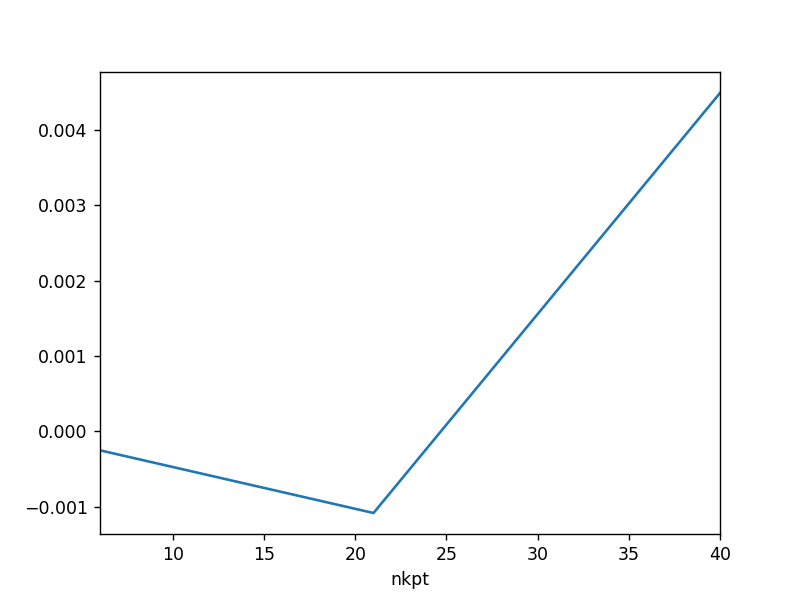

In [19]:
frame.plot("nkpt", "pressure", legend=None)